<a href="https://colab.research.google.com/github/Leonhard-Hopeful/ML-Algorithms/blob/main/linear_regression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [2]:
# Load the California housing dataset
housing = fetch_california_housing()


In [3]:
# Create a Pandas DataFrame from the dataset
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [4]:
# Select features and target
X = df.drop('target', axis=1).values
y = df['target'].values

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Build the linear regression model
model = keras.Sequential([
  keras.layers.Dense(1, input_shape=(X_train.shape[1],))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.6473 - mae: 2.0070 - val_loss: 4.8366 - val_mae: 1.7284
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2177 - mae: 1.6098 - val_loss: 3.3285 - val_mae: 1.3791
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9744 - mae: 1.2823 - val_loss: 2.3376 - val_mae: 1.0868
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.4256 - mae: 1.0142 - val_loss: 1.6845 - val_mae: 0.8691
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6207 - mae: 0.8194 - val_loss: 1.2666 - val_mae: 0.7278
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2307 - mae: 0.6922 - val_loss: 1.0068 - val_mae: 0.6515
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9187 - mae: 0.6314 - val_loss: 0.8574 - val_mae: 0.6162
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9897 - mae: 0.6030 - val_loss: 0.7700 - val_mae: 0.6024
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [10]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on test data: {mae}")

Mean Absolute Error on test data: 0.5320826768875122


In [11]:
# Make predictions
y_pred = model.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


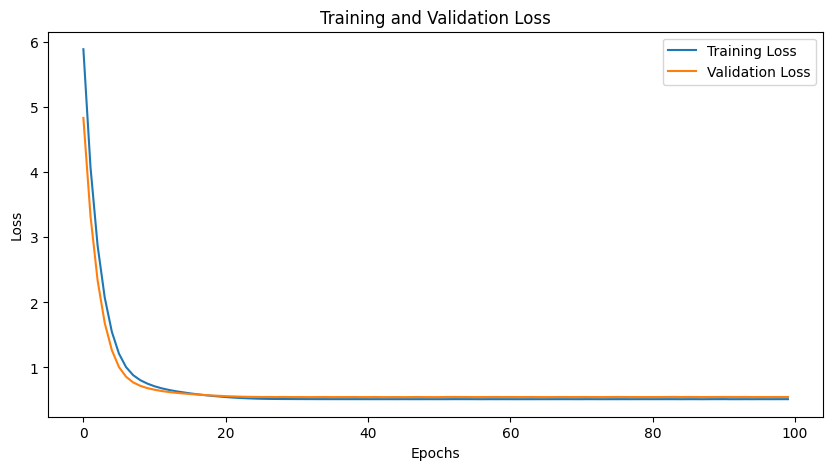

In [12]:
# Visualizations
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



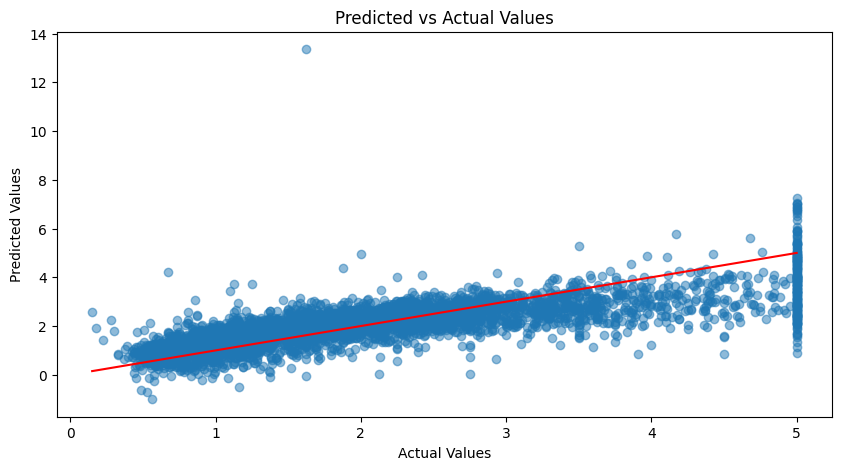

In [13]:
# Plot predictions vs. actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line
plt.show()


In [33]:
!rm -rf /content/ML-Algorithms

In [34]:
ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
